#### Import libraries and load data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "hly4935.csv"
data = pd.read_csv(file_path)

print(data.head())

                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]


/tmp/ipykernel_5719/1629483251.py:5: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


#### Handle temperature data

In [9]:
data['temp'] = pd.to_numeric(data['temp'], errors='coerce')

# Interpolate missing values
data['temp'] = data['temp'].interpolate() 

#### Calculate mean temperature each day and for each month

In [11]:
day_mean_temp = data.resample('D')['temp'].mean()

month_mean_temp = data.resample('M')['temp'].mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

#### Creat plot for dayly temperature

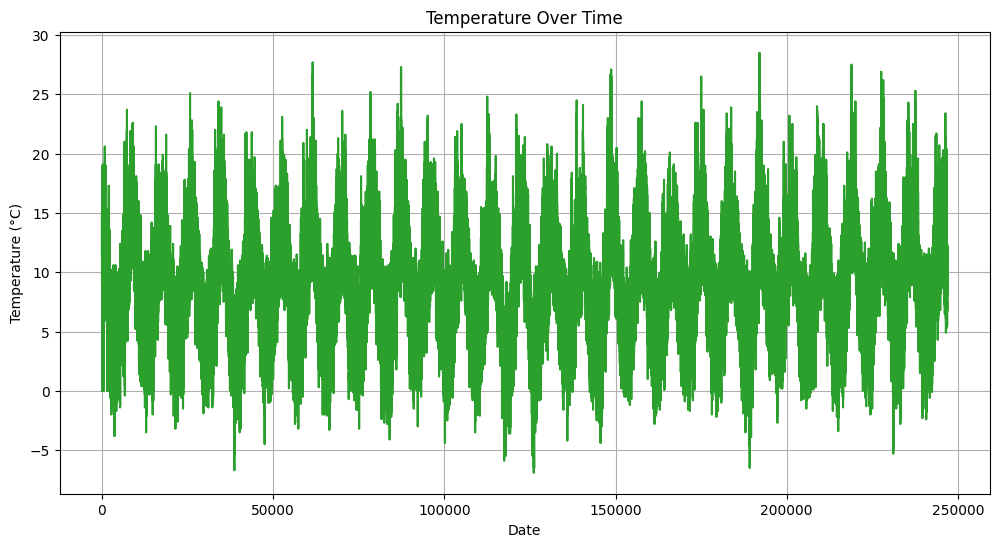

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(data['temp'], label='Temperature (°C)', color='tab:green')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

#### Create Plot for mean temperature each day

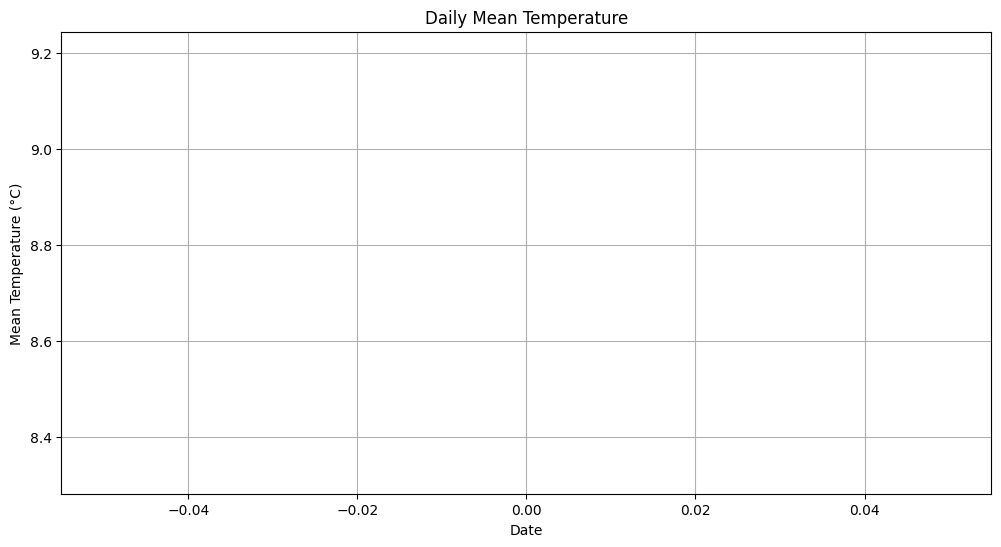

In [13]:
plt.figure(figsize=(12, 6))

plt.plot(day_mean_temp, label='Daily Mean Temperature (°C)', color='tab:blue')
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')

plt.grid()
plt.show()

#### Create Plot for mean temperature for each month

AttributeError: 'numpy.float64' object has no attribute 'index'

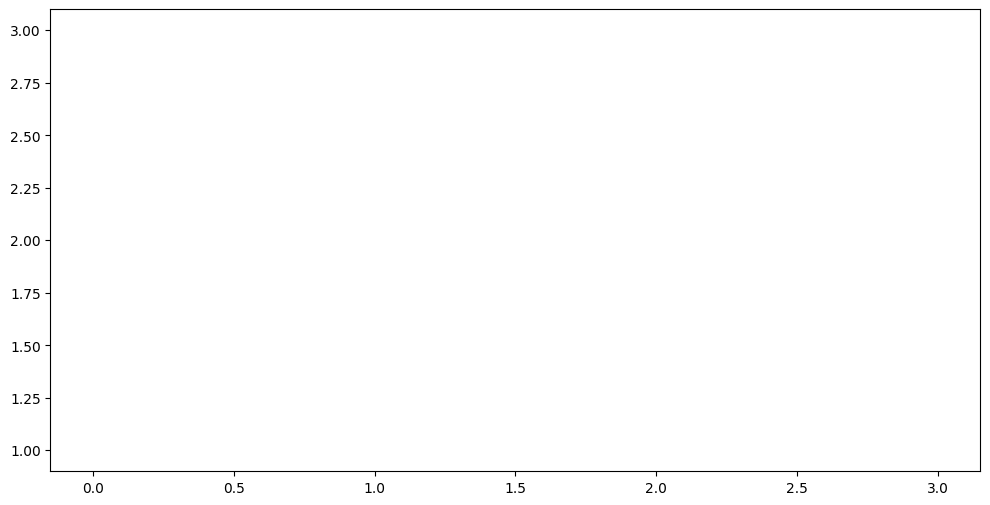

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(3, 1, 3)
plt.plot(month_mean_temp.index, month_mean_temp, label='Mean Monthly Temperature', color='grey')
plt.title('Mean Monthly Temperature')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.tight_layout()
plt.show()

--------------------------

#### Handle windspeed data (wdsp)

In [ ]:
# Convert to numeric and handle errors
data['wdsp'] = pd.to_numeric(data['wdsp'], errors='coerce') 

# Interpolate missing values
data['wdsp'] = data['wdsp'].interpolate()  

#### Calculate rolling windspeed (24-hour)

In [ ]:
data['wddir'] = data['wdsp'].rolling(window=24).mean()

#### Calculate max windspeed

In [ ]:
max_wind_daily = data['wdsp'].resample('D').max()

#### Calculate monthly mean of daily max windspeeds

In [ ]:
mean_max_wind_monthly = max_wind_daily.resample('M').mean()

/tmp/ipykernel_6611/247961696.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean_max_wind_monthly = max_wind_daily.resample('M').mean()


#### Create Plot for windspeed

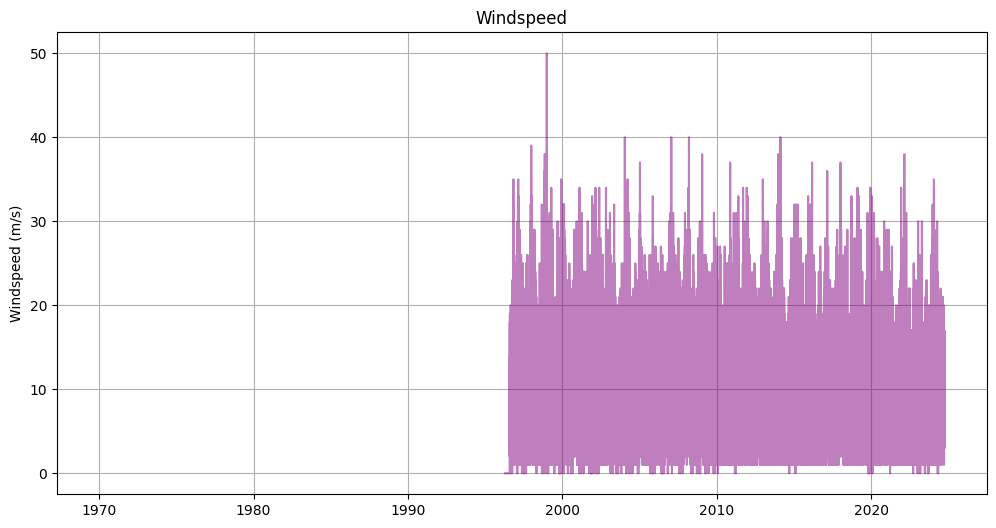

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(3, 1, 1)
plt.plot(data.index, data['wdsp'], label='Windspeed', color='purple', alpha=0.5)
plt.title('Windspeed')
plt.ylabel('Windspeed (m/s)')
plt.grid()
plt.show()

#### Create Plot for rolling windspeed

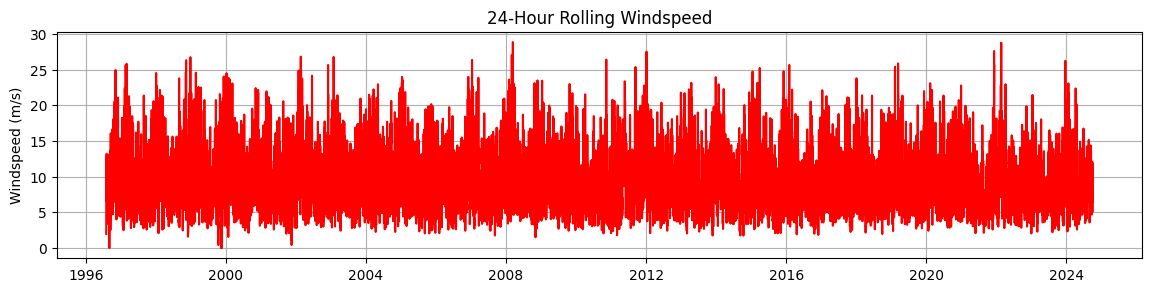

In [ ]:
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 2)
plt.plot(data.index, data['wddir'], label='24-Hour Rolling Windspeed', color='red')
plt.title('24-Hour Rolling Windspeed')
plt.ylabel('Windspeed (m/s)')
plt.grid()
plt.show()

#### Create Plot monthly mean of daily max windspeeds

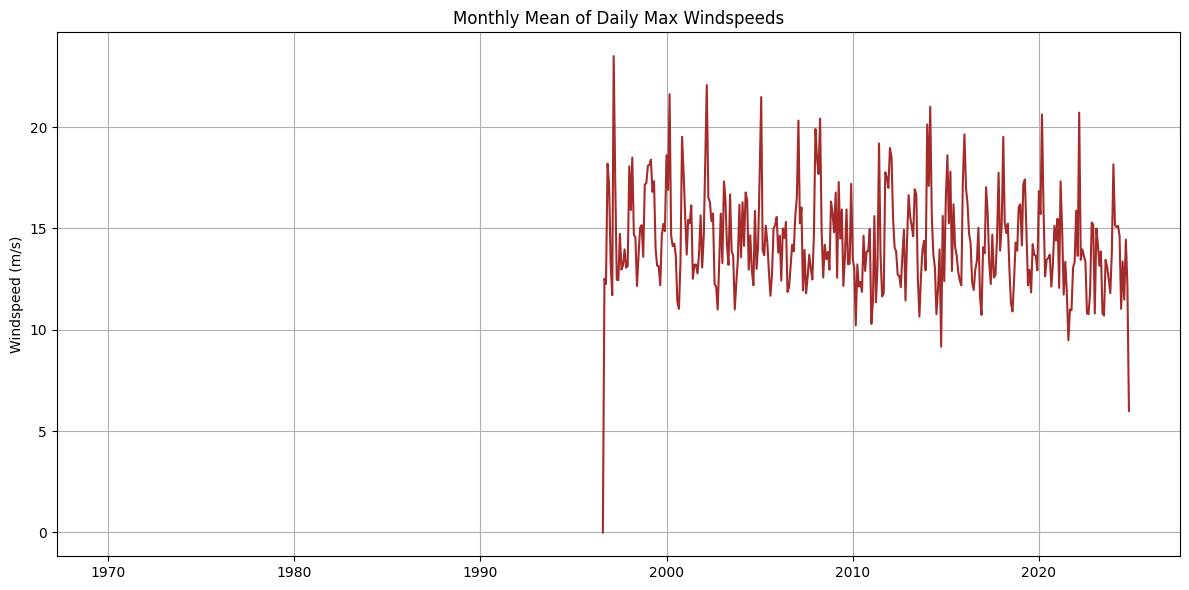

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(3, 1, 3)
plt.plot(mean_max_wind_monthly.index, mean_max_wind_monthly, label='Monthly Mean of Max Windspeeds', color='brown')
plt.title('Monthly Mean of Daily Max Windspeeds')
plt.ylabel('Windspeed (m/s)')
plt.grid()
plt.tight_layout()
plt.show()